In [28]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# Initialize COCO object
coco = COCO('C:/Users/Usuario/UNIVERSIDAD/pro/TFG/Annotations/annotations_trainval2017/annotations/instances_train2017.json')

In [21]:
# Get all existing category IDs and names in the whole dataset
category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)

# Get all image IDs
image_ids = coco.getImgIds()
_id = image_ids[0]

In [22]:
# Get information about a specific image
image_info = coco.loadImgs(_id)
image_info

[{'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895}]

In [25]:
# get all images containing given categories
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
# get image with specific id
imgIds = coco.getImgIds(imgIds = [_id])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

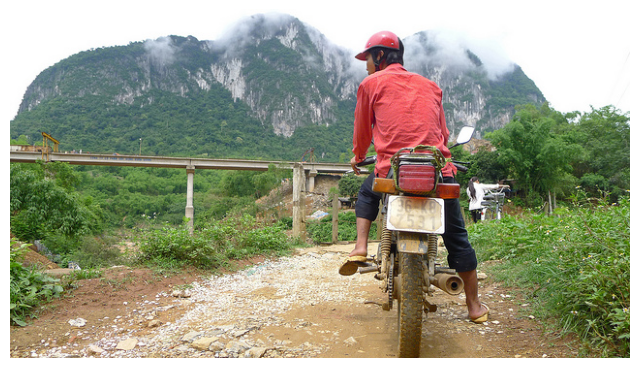

In [29]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

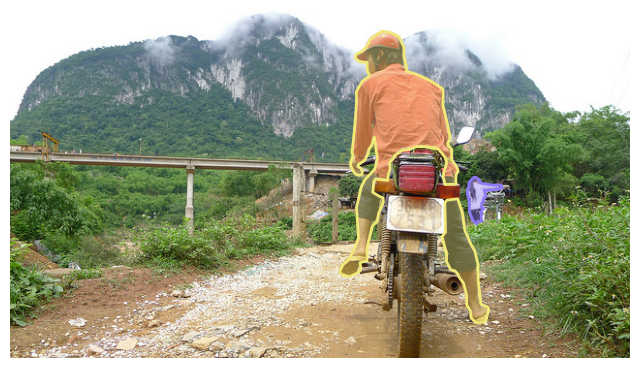

In [30]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [33]:
# initialize COCO api for caption annotations
annFile = 'C:/Users/Usuario/UNIVERSIDAD/pro/TFG/Annotations/annotations_trainval2017/annotations/captions_train2017.json'
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.05s)
creating index...
index created!


A man with a red helmet on a small moped on a dirt road. 
Man riding a motor bike on a dirt road on the countryside.
A man riding on the back of a motorcycle.
A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
A man in a red shirt and a red hat is on a motorcycle on a hill side.


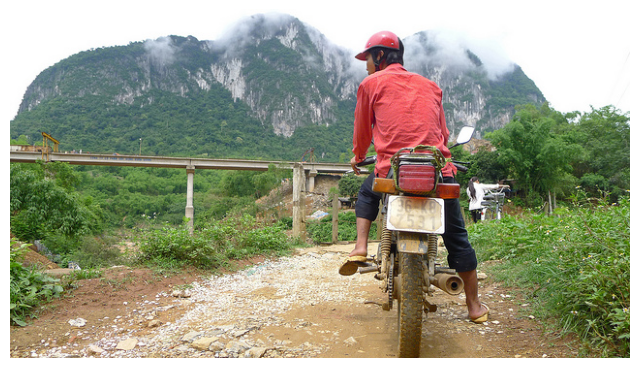

In [34]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()